In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 41.0MB/s]


In [27]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
print(mobile_sales.shape)
mobile_sales.head()

(217, 2)


,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [28]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [29]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [30]:
# 2 things to check while working on Times Series Data ->
# Missing Values
# Anomalies

In [31]:
mobile_sales.set_index('DATE',inplace=True)

In [32]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


In [33]:
mobile_sales.isnull().sum()

,0
Sales,19


<Axes: xlabel='DATE'>

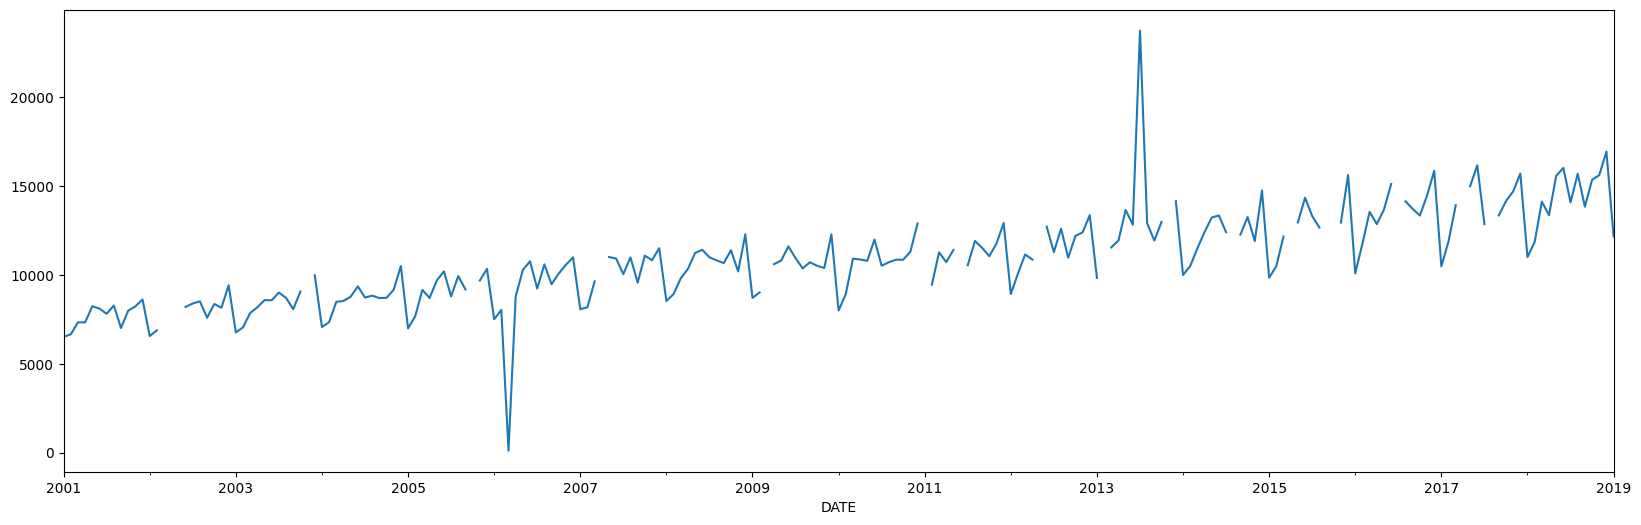

In [38]:
plt.rcParams['figure.figsize'] = (20, 6)
mobile_sales['Sales'].plot()

In [35]:
# We impute it with the value before and after the missing value

In [36]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


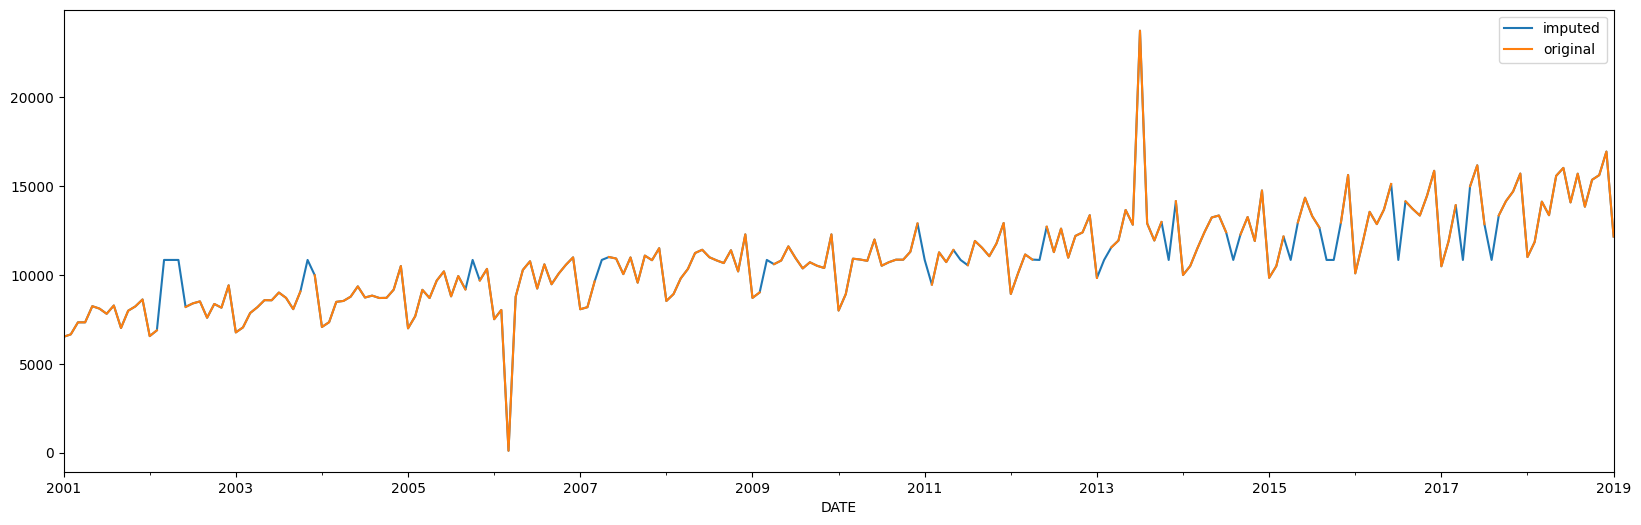

In [39]:
# lst method - Imputing it by mean of entire series

mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

**Q. Is there a better way to fill NaNs?**

Taking an average for the entire signal didn't work.

Lets try something else.

How about we take the **average of the first point before and first point after** the missing value and fill the missing value with this average.

- This makes sense, as this way, we would still be taking average, but instead of taking it for the entire signal, we take average for the specific gap in data.
- This will ensure that we're not under or over estimating the values.
- As the average value would be **unique** to each gap in signal.

For example,
- if we're missing data for February 2005,
- we can assume that the sales in that month would be an average of sales in January 2005 and March 2005.

![picture](https://drive.google.com/uc?export=view&id=1Lk-Km2n9Usx_V9ikYrlnVv0aqHDs8Meq)


This is called **Linear Interpolation**.

Let's apply this now.

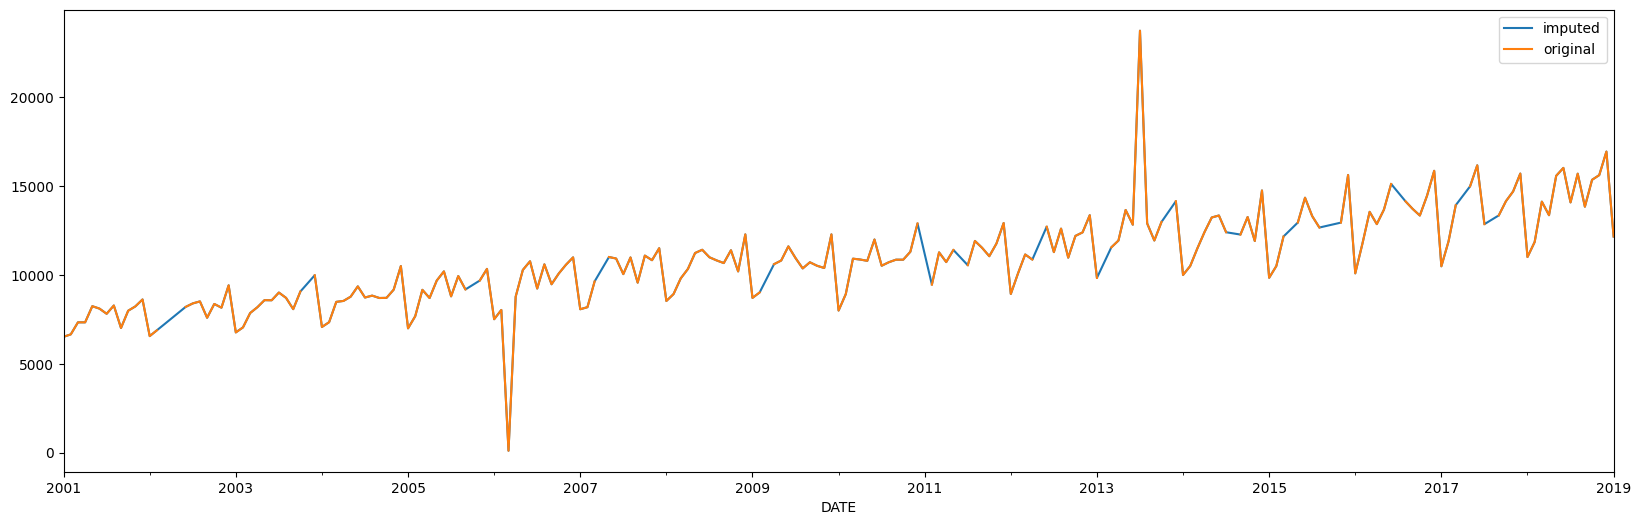

In [40]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()